# Full Boss NUM density

In [2]:
import sys, os
sys.path.append('../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
path = '/n/des/lee.5922/data/cmass_cat/dr12_multidark_patchy_mocks/'
cmass_mock_rand_file_S = np.loadtxt(path+'Patchy-Mocks-Randoms-DR12NGC-COMPSAM_V6C_x100.dat')

IOError: /n/des/lee.5922/data/cmass_cat/dr12_multidark_patchy_mocks/Patchy-Mocks-Randoms-DR12NGC-COMPSAM_V6C_x10.dat not found.

In [6]:
#cmass_mock_rand_file = np.loadtxt(path+'Random-DR12CMASS-N-V6C-x10.dat')
random_mock_S = np.zeros( (cmass_mock_rand_file_S.shape[0],), 
                         dtype = [('RA', 'float'), ('DEC', 'float'), ('Z', 'float'), ('VETO_FLAG', 'int')])
random_mock_S['RA'] = cmass_mock_rand_file_S[:,0]
random_mock_S['DEC'] = cmass_mock_rand_file_S[:,1]
random_mock_S['Z'] = cmass_mock_rand_file_S[:,2]
random_mock_S['VETO_FLAG'] = cmass_mock_rand_file_S[:,5]
#random_mock_S = random_mock_S[ random_mock_S['VETO_FLAG'] == 1]

In [3]:
path1 = '/n/des/lee.5922/data/cmass_cat/dr12_multidark_patchy_mocks/'
path2 = '/n/des/lee.5922/data/cmass_cat//'
#mock_rand_ngc = esutil.io.read([path1+'Patchy-Mocks-Randoms-DR12NGC-COMPSAM_V6C_x100.fits',
#                               path2+'Random-DR12CMASS-N-V6C-x50.fits'
#                               ], combine=True  )
mock_rand_sgc = esutil.io.read([path1+'Patchy-Mocks-Randoms-DR12SGC-COMPSAM_V6C_x100.fits',
                               path2+'Random-DR12CMASS-S-V6C-x50.fits'
                               ], combine=True  )

reading 1/2 /n/des/lee.5922/data/cmass_cat/dr12_multidark_patchy_mocks/Patchy-Mocks-Randoms-DR12SGC-COMPSAM_V6C_x100.fits
reading 2/2 /n/des/lee.5922/data/cmass_cat//Random-DR12CMASS-S-V6C-x50.fits


In [4]:
def valid_hp(cat, nside = 4096):
    
    hpind = hpRaDecToHEALPixel(cat['RA'], cat['DEC'], nside=nside, nest= False)
    hpind_reject = hpRaDecToHEALPixel(cat['RA'][cat['VETO_FLAG'] == 0], 
                                    cat['DEC'][cat['VETO_FLAG'] == 0], nside=nside, nest= False)
    
    hppixnumber = np.arange(hp.nside2npix(nside))
    
    geomask = np.in1d( hppixnumber, hpind )
    rejectmask = np.in1d( hppixnumber, hpind_reject )
    
    print np.sum(geomask), np.sum(~rejectmask)
    
    
    totalmask = geomask * (~rejectmask)
    return hppixnumber[totalmask]


def hp_mask(cat, valid_hpind, nside = 4096):
    hpind = hpRaDecToHEALPixel(cat['RA'], cat['DEC'], nside=nside, nest= False)
    HPmask = np.in1d(hpind, valid_hpind)
    return HPmask



def BOSSveto(cat, option='SGC'):
    
    if option == 'SGC':
        valid_hpind = fitsio.read('/n/des/lee.5922/data/cmass_cat/vetomask/mask_nside4096_Patchy-Mocks-Randoms-DR12SGC-COMPSAM_V6C.fits')
    elif option == 'NGC': 
        vetomaskNGC = fitsio.read('/n/des/lee.5922/data/cmass_cat/vetomask/mask_nside4096_Patchy-Mocks-Randoms-DR12NGC-COMPSAM_V6C.fits')

    hpind = hpRaDecToHEALPixel(cat['RA'], cat['DEC'], nside=4096, nest= False)
    HPmask = np.in1d(hpind, valid_hpind)
    
    return cat[HPmask]

In [5]:
4096*3

12288

In [5]:
valid_hp4096 = valid_hp(mock_rand_sgc, nside = 4096)
vetoed_obj = hp_mask(mock_rand_sgc, valid_hp4096, nside = 4096)

13190012 199959818


In [6]:
valid_hp8192 = valid_hp(mock_rand_sgc, nside = 8192)
vetoed_obj8192 = hp_mask(mock_rand_sgc, valid_hp8192, nside = 8192)

30047163 802553825


In [ ]:
valid_hp12288 = valid_hp(mock_rand_sgc, nside = 12288)
vetoed_obj12288 = hp_mask(mock_rand_sgc, valid_hp12288, nside = 12288)

In [7]:
print 'vetoed by flag', np.sum(mock_rand_sgc['VETO_FLAG'] == 0)
print 'vetoed by 4096mask', mock_rand_sgc.size - np.sum(vetoed_obj)
print 'vetoed by 8192mask', mock_rand_sgc.size - np.sum(vetoed_obj8192)
print 'vetoed by 12288mask', mock_rand_sgc.size - np.sum(vetoed_obj12288)
#print 'vetoed by 2048mask', mock_rand_sgc.size - np.sum(vetoed_obj2048)

vetoed by flag 4499012
vetoed by 4096mask 5371823
vetoed by 8192mask 4661254


In [ ]:
valid_hp4096 = valid_hp(mock_rand_ngc, nside = 4096)
vetoed_obj = hp_mask(mock_rand_ngc, valid_hp4096, nside = 4096)

valid_hp8192 = valid_hp(mock_rand_ngc, nside = 4096*2)
vetoed_obj8192 = hp_mask(mock_rand_ngc, valid_hp8192, nside = 8192)

valid_hp12288 = valid_hp(mock_rand_ngc, nside = 12288)
vetoed_obj12288 = hp_mask(mock_rand_ngc, valid_hp12288, nside = 12288)

print 'vetoed by flag', np.sum(mock_rand_ngc['VETO_FLAG'] == 0)
print 'vetoed by 4096mask', mock_rand_ngc.size - np.sum(vetoed_obj)
print 'vetoed by 8192mask', mock_rand_ngc.size - np.sum(vetoed_obj8192)
print 'vetoed by 12288mask', mock_rand_ngc.size - np.sum(vetoed_obj12288)
#print 'vetoed by 2048mask', mock_rand_sgc.size - np.sum(vetoed_obj2048)

In [8]:
fitsio.write('/n/des/lee.5922/data/cmass_cat/vetomask/mask_nside8192_Patchy-Mocks-Randoms-DR12SGC-COMPSAM_V6C.fits', valid_hp8192)
#fitsio.write('/n/des/lee.5922/data/cmass_cat/vetomask/mask_nside12288_Patchy-Mocks-Randoms-DR12NGC-COMPSAM_V6C.fits', valid_hp12288)

In [ ]:
rand_sgc = esutil.io.read(['/n/des/lee.5922/data/cmass_cat/random0_DR12v5_CMASS_South.fits.gz', 
                           '/n/des/lee.5922/data/cmass_cat/random1_DR12v5_CMASS_South.fits.gz'], combine=True)
rand_ngc = esutil.io.read(['/n/des/lee.5922/data/cmass_cat/random0_DR12v5_CMASS_North.fits.gz',
                           '/n/des/lee.5922/data/cmass_cat/random1_DR12v5_CMASS_North.fits.gz'],combine=True)

In [5]:
path = '/n/des/lee.5922/data/cmass_cat/dr12_multidark_patchy_mocks/'
cmass_mock_rand_file_S = np.loadtxt(path+'Random-DR12CMASS-S-V6C-x50.dat')
#cmass_mock_rand_file_N = np.loadtxt(path+'Random-DR12CMASS-N-V6C-x50.dat')

In [13]:
cmass_mock_rand_file_S, cmass_mock_rand_file_N = None, None

In [6]:
#cmass_mock_rand_file = np.loadtxt(path+'Random-DR12CMASS-N-V6C-x10.dat')
random_mock_S = np.zeros( (cmass_mock_rand_file_S.shape[0],), 
                         dtype = [('RA', 'float'), ('DEC', 'float'), ('Z', 'float'), ('VETO_FLAG', 'int')])
random_mock_S['RA'] = cmass_mock_rand_file_S[:,0]
random_mock_S['DEC'] = cmass_mock_rand_file_S[:,1]
random_mock_S['Z'] = cmass_mock_rand_file_S[:,2]
random_mock_S['VETO_FLAG'] = cmass_mock_rand_file_S[:,5]
#random_mock_S = random_mock_S[ random_mock_S['VETO_FLAG'] == 1]


random_mock_N = np.zeros( (cmass_mock_rand_file_N.shape[0],), 
                         dtype = [('RA', 'float'), ('DEC', 'float'), ('Z', 'float'), ('VETO_FLAG', 'int')])
random_mock_N['RA'] = cmass_mock_rand_file_N[:,0]
random_mock_N['DEC'] = cmass_mock_rand_file_N[:,1]
random_mock_N['Z'] = cmass_mock_rand_file_N[:,2]
random_mock_N['VETO_FLAG'] = cmass_mock_rand_file_N[:,5]
#random_mock_S = random_mock_S[ random_mock_S['VETO_FLAG'] == 1]

figsave : .//spatialtest_.png


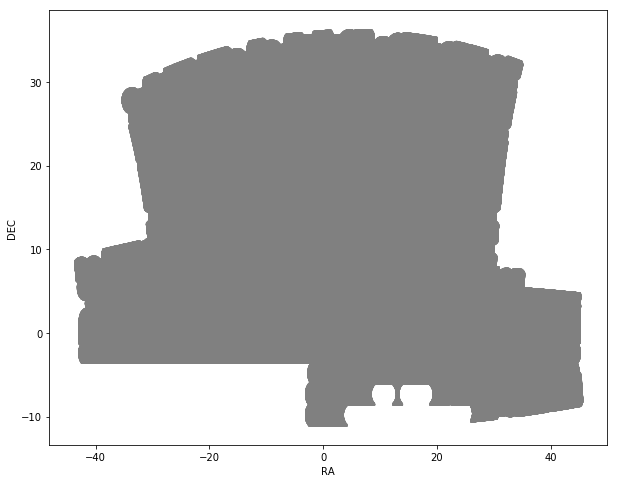

In [15]:
spatialcheck([random_mock_S])

figsave : .//spatialtest_.png


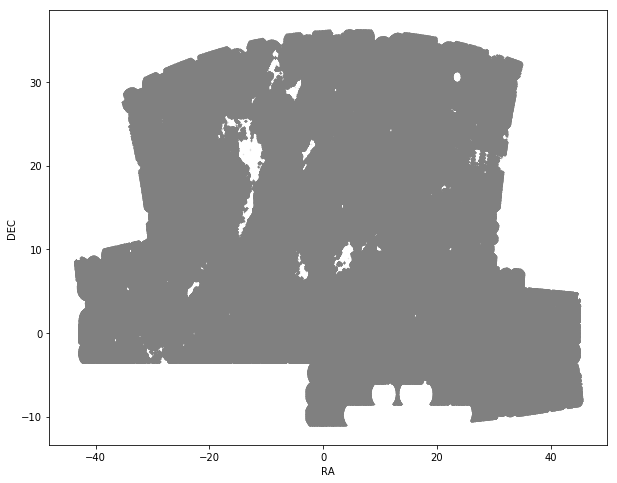

In [20]:
spatialcheck([random_mock_S[random_mock_S['VETO_FLAG'] == 1]])

figsave : .//spatialtest_.png


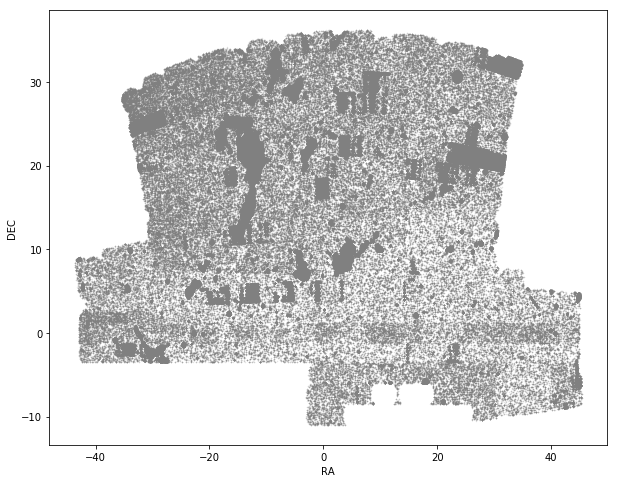

In [19]:
spatialcheck([random_mock_S[random_mock_S['VETO_FLAG'] == 0]])

In [12]:
fitsio.write(path+'Random-DR12CMASS-S-V6C-x50.fits', random_mock_S)
fitsio.write(path+'Random-DR12CMASS-N-V6C-x50.fits', random_mock_N)

In [10]:
random_mock_S = random_mock_S[ random_mock_S['VETO_FLAG'] == 1]
random_mock_N = random_mock_N[ random_mock_N['VETO_FLAG'] == 1]

1134401

In [ ]:
spatia

In [11]:
np.sum( random_mock_S['VETO_FLAG'] == 1)

11513408

In [2]:
# calling map 
GoldMask = callingEliGoldMask()
#GoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)
GoldMask_st82 = GoldMask[ GoldMask['DEC'] > -3.0 ]
GoldMask_spt = GoldMask[ GoldMask['DEC'] < -3.0 ]
#GoldMask_spt = Cuts.SpatialCuts(GoldMask_spt, ra=0, ra2 = 100, dec=-52, dec2 = -48)

pixarea = hp.nside2pixarea( 4096, degrees = True)
sptnpix = np.sum(GoldMask_spt['FRAC']) #hp.get_map_size( GoldMask_spt['PIXEL'] )
st82npix =  np.sum(GoldMask_st82['FRAC']) # hp.get_map_size( GoldMask_st82 )
SPTMaparea = pixarea * sptnpix
ST82Maparea = pixarea * st82npix

In [3]:
ST82Maparea, SPTMaparea

(123.17511816060514, 1243.5360337558907)

In [5]:
#path = '/n/des/lee.5922/data/cmass_cat/'
#cmass_ngc_photo = esutil.io.read(path+'cmass-dr12v4-N-Reid-full.dat.fits')
#cmass_sgc_photo = esutil.io.read(path+'cmass-dr12v4-S-Reid-full.dat.fits')
#cmass_train_photo = Cuts.keepGoodRegion(cmass_sgc_photo)

In [5]:
import numpy as np

path = '/n/des/lee.5922/data/cmass_cat/'

#cmass_ngc = esutil.io.read(path+'galaxy_DR12v5_CMASS_North.fits.gz')
#cmass_sgc = esutil.io.read(path+'galaxy_DR12v5_CMASS_South.fits.gz')
cmass_ngc = esutil.io.read(path+'cmass-dr12v4-N-Reid-full.dat.fits')
cmass_sgc = esutil.io.read(path+'cmass-dr12v4-S-Reid-full.dat.fits')
#cmass_ngc = cmass_ngc[(cmass_ngc['Z'] > 0.43) & (cmass_ngc['Z'] < 0.7)]
#cmass_sgc = cmass_sgc[(cmass_sgc['Z'] > 0.43) & (cmass_sgc['Z'] < 0.7)]
#cmass_train = Cuts.SpatialCuts(cmass_sgc, ra=310, ra2=360, dec=-2, dec2=2)
cmass_train = Cuts.keepGoodRegion(cmass_sgc)

In [6]:
print cmass_train.size

13046


In [4]:
rootdir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/'

In [5]:
dmass_spt = io.SearchAndCallFits(path = rootdir, columns = None, keyword = 'dmass_spt_sys_v3.fits')
dmass_spt = dmass_spt[ dmass_spt['CMASS_PROB'] > 0.01 ]
dmass_st82 = io.SearchAndCallFits(path = rootdir, columns = None, keyword = 'gold_st82_prob.fits')
dmass_st82 =dmass_st82[ dmass_st82['EachProb_CMASS'] > 0.01]

train = esutil.io.read(rootdir+'train_sample_des.fits')
train = Cuts.keepGoodRegion(train)

dmass_spt = Cuts.keepGoodRegion(dmass_spt)
dmass_st82 = Cuts.keepGoodRegion(dmass_st82)

print np.sum(dmass_st82['EachProb_CMASS'])
print np.sum(dmass_spt['CMASS_PROB'])
print train.size


--------------------------------
 calling catalog
--------------------------------
dmass_spt_sys_v3.fits

--------------------------------
 calling catalog
--------------------------------
gold_st82_prob.fits
12637.112833275674
117292.90214602613
12639


In [29]:
#train = esutil.io.read(rootdir+'train_sample_des.fits')
#train = Cuts.keepGoodRegion(train)

#dmass_spt = dmass_spt[dmass_spt['EachProb_CMASS'] > 0.01]
#dmass_st82 = dmass_st82[dmass_st82['EachProb_CMASS'] > 0.01]

In [15]:
print np.sum(dmass_st82['EachProb_CMASS']), np.sum(dmass_spt['EachProb_CMASS']), train.size

13002.574050557929 120874.72753482158 12639


In [35]:
rand_sgc = fitsio.read('/n/des/lee.5922/data/cmass_cat/random0_DR12v5_CMASS_South.fits.gz')
rand_ngc = fitsio.read('/n/des/lee.5922/data/cmass_cat/random0_DR12v5_CMASS_North.fits.gz')
random_train = Cuts.keepGoodRegion(rand_sgc)

In [7]:
GoldMask.size

6763130

In [9]:
randomfull = uniform_random_on_sphere(GoldMask, size = GoldMask.size * 10)
randomfull = Cuts.keepGoodRegion(randomfull)

In [11]:
randind = np.random.choice( range(randomfull.size), size = int(randomfull.size * 0.94) )
random = randomfull[randind]
random_spt = random[ random['DEC'] < -30.0 ]
random_st82 = random[ random['DEC'] > -10.0 ]
#random_gold_st82 = random_spt[ random_spt['DEC'] > -3.0 ]

#print random_train.size, random_st82.size

In [11]:
np.sum(dmass_st82['EachProb_CMASS']) * 1./random_st82.size, np.sum(dmass_spt['EachProb_CMASS']) * 1./random_spt.size

NameError: name 'random_st82' is not defined

figsave : .//spatialtest_.png


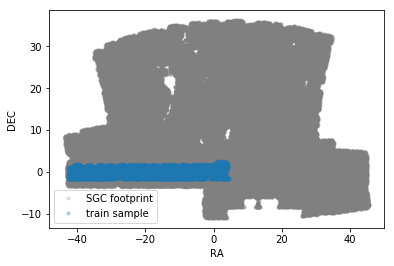

In [20]:
spatialcheck([ra, cmass_train], label=['SGC footprint', 'train sample'])

In [37]:
#cmass_mock_fileN = np.loadtxt(path+'patchy_mock/Patchy-Mocks-DR12CMASS-N-V6C-Portsmouth-mass_0001.dat')
cmass_mock_file = np.loadtxt(path+'patchy_mock/Patchy-Mocks-DR12CMASS-S-V6C-Portsmouth-mass_0001.dat')
#cmass_mock_file = np.vstack([cmass_mock_fileN, cmass_mock_fileS])

#cmass_mock_rand_fileN = np.loadtxt(path+'Random-DR12CMASS-N-V6C-x10.dat')
cmass_mock_rand_file = np.loadtxt(path+'Random-DR12CMASS-S-V6C-x10.dat')
#cmass_mock_rand_file = np.vstack([cmass_mock_rand_fileN, cmass_mock_rand_fileS])

#cmass_mock_fileN, cmass_mock_fileS = None, None
#cmass_mock_rand_fileN, cmass_mock_rand_fileS = None, None

In [217]:
#cmass_mock_rand_fileN = np.loadtxt(path+'Random-DR12CMASS-N-V6C-x10.dat')
cmass_mock_rand_file = np.loadtxt(path+'Random-DR12CMASS-S-V6C-x10.dat')
#cmass_mock_rand_file = np.vstack([cmass_mock_rand_fileN, cmass_mock_rand_fileS])

#cmass_mock_fileN, cmass_mock_fileS = None, None
#cmass_mock_rand_fileN, cmass_mock_rand_fileS = None, None

In [ ]:
cmass_mock_fileN, cmass_mock_fileS = None, None
cmass_mock_rand_fileN, cmass_mock_rand_fileS = None, None

In [38]:
#cmass_mock_file = np.loadtxt(path+'patchy_mock/Patchy-Mocks-DR12CMASS-N-V6C-Portsmouth-mass_0001.dat')
cmass_mock = np.zeros( (cmass_mock_file.shape[0],), dtype = [('RA', 'float'), ('DEC', 'float'), ('Z', 'float'),('VETO_FLAG', 'int')])
cmass_mock['RA'] = cmass_mock_file[:,0]
cmass_mock['DEC'] = cmass_mock_file[:,1]
cmass_mock['Z'] = cmass_mock_file[:,2]
cmass_mock['VETO_FLAG'] = cmass_mock_file[:,6]
#cmass_mock = cmass_mock[(cmass_mock['Z'] > 0.43) & (cmass_mock['Z'] < 0.7)]

#cmass_mock_rand_file = np.loadtxt(path+'Random-DR12CMASS-N-V6C-x10.dat')
random_mock = np.zeros( (cmass_mock_rand_file.shape[0],), dtype = [('RA', 'float'), ('DEC', 'float'), ('Z', 'float'), ('VETO_FLAG', 'int')])
random_mock['RA'] = cmass_mock_rand_file[:,0]
random_mock['DEC'] = cmass_mock_rand_file[:,1]
random_mock['Z'] = cmass_mock_rand_file[:,2]
random_mock['VETO_FLAG'] = cmass_mock_rand_file[:,5]

cmass_mock = cmass_mock[ cmass_mock['VETO_FLAG'] == 1]
random_mock = random_mock[ random_mock['VETO_FLAG'] == 1]

In [12]:
def CalculateNumDensity(cat, random, weight = 'DES'):
    
    if weight is 'DES' :
        try:
            ncat = np.sum( cat['EachProb_CMASS'] )
            num_density = ncat * 1./random.size 
            
        except ZeroDivisionError: num_density = 0.0
        
    elif weight is True :
        try : num_density = np.sum( cat['WEIGHT_FKP']* cat['WEIGHT_SYSTOT']*( cat['WEIGHT_CP'] +cat['WEIGHT_NOZ'] - 1 )) * 1./random['WEIGHT_FKP'].size 
        except ZeroDivisionError: num_density = 0.0
        
    elif weight is False :
        num_density = cat.size *1./random.size 
        
    else : print 'something is wrong!!!'
        
    return num_density

In [13]:
def CalculateNumDensityArea(cat, area, weight = 'DES'):
    
    if weight is 'DES' :
        try:
            ncat = np.sum( cat['EachProb_CMASS'] )
            num_density = ncat * 1./area
            
        except ZeroDivisionError: num_density = 0.0
        
    elif weight is True :
        try : num_density = np.sum( cat['WEIGHT_SYSTOT']*( cat['WEIGHT_CP'] +cat['WEIGHT_NOZ'] - 1 )) * 1./area 
        except ZeroDivisionError: num_density = 0.0
        
    elif weight is False :
        num_density = cat.size *1./area
        
    else : print 'something is wrong!!!'
        
    return num_density

In [40]:
# add jack knife error
def jkerror( catalog, random, njack = 10 ):
    import os
    #from suchyta_utils import _jkfunctions as _jk

    # jk error
    jkfile = './jkregion.txt'
    jk.GenerateJKRegions( catalog['RA'], catalog['DEC'], njack, jkfile)
    jktest = jk.SphericalJK( target = CalculateNumDensity, jkargs=[catalog, random], jkargsby=[['RA', 'DEC'],['RA', 'DEC']], \
                            nojkargs=[], regions = jkfile)
    jktest.DoJK( regions = jkfile )
    jkresults = jktest.GetResults(jk=True, full = True)

    
    full_j = jkresults['full']   
    it = jkresults['it']
    it_j = jkresults['jk']

    norm = (njack-1)*1./njack
    #cov = np.std(it_j)**2 * norm
    cov = np.sum((it_j - it_j.mean())**2) * norm
    
    
    os.remove(jkfile)
    return it_j.mean(), it_j, np.sqrt(cov)

In [207]:
# stat error

nside = 32
hpix8 = hpRaDecToHEALPixel(cmass_ngc['RA'], cmass_ngc['DEC'], nside= nside )
hpix8rand = hpRaDecToHEALPixel(rand_ngc['RA'], rand_ngc['DEC'], nside= nside )
apix8 = hp.nside2pixarea(nside, degrees=True)

hpix8list = list(set(hpix8))
#n_density_ngc = np.zeros((len(hpix8list)-1))
N = np.zeros((len(hpix8list)-1))
N_rand = np.zeros((len(hpix8list)-1))

cmass_ngc_catlist = []
rand_ngc_catlist = []
#fig, ax = plt.subplots()
for j in np.arange(0, len(hpix8list)-1, 1):
    #print j, j+1
    ma = (hpix8 == hpix8list[j])# | (hpix8 == hpix8list[j+1])
    ma3 = (hpix8rand == hpix8list[j]) #| (hpix8rand == hpix8list[j+1])    
    n_density_ngc[j] = CalculateNumDensity(cmass_ngc[ma], rand_ngc[ma3], weight = False )
    
    cmass_ngc_catlist.append(cmass_ngc[ma])
    rand_ngc_catlist.append(rand_ngc[ma3])
                              
    N[j] = np.sum(ma)
    N_rand[j] = np.sum(ma3)
    #ax.plot(cmass_ngc[ma]['RA'], cmass_ngc[ma]['DEC'], '.')  
    print '\r', j *1./ len(hpix8list) * 100, '%',


#cut = (len(hpix8list)-1)/2
#n_density_ngc = n_density_ngc[:cut]
#N = N[:cut]
#N_rand = N_rand[:cut]

#mask_ngc = (n_density_ngc !=0)&(N_rand > N_rand.mean())
#n_density_ngc = n_density_ngc[mask_ngc]
#print 'Cutting out patches whose area is smaller than 10percent of healpix nside=8'
#n_density_ngc_norm = n_density_ngc * 1./np.mean(n_density_ngc)
#std_ngc = np.std(n_density_ngc_norm)
#err_ngc = 1./np.sqrt(n_density_ngc) * n_density_ngc_norm

99.91500212494687476                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [256]:
N_rand.mean()

13669.922619047618

figsave : .//spatialtest_.png


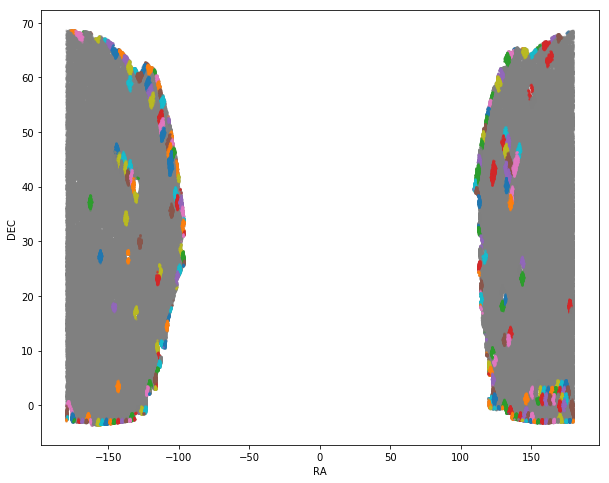

In [261]:
cut = N_rand[N_rand>11000].mean()
invalid_ind = np.arange(len(cmass_ngc_catlist) )[N_rand < cut*0.8 ]
ngc_clean = [cmass_ngc_catlist[i] for i in invalid_ind]
spatialcheck( [cmass_ngc]+ngc_clean )

In [236]:
apix8 *37

124.21545949125269

In [298]:
len(valid_ind_split[40])

37

In [336]:
cut = N_rand[N_rand>11000].mean()
valid_ind = np.arange(len(cmass_ngc_catlist) ) #[N_rand > cut*0.8 ]
valid_ind_split = np.array_split(valid_ind, len(valid_ind)/36 + 1 )
print valid_ind_split[0].size, valid_ind_split[-1].size

n_density_ngc = []
for vi in valid_ind_split:
    n_density_ngc.append( np.sum(N[vi])*1./ np.sum(N_rand[vi]) )
      
n_density_ngc = np.array(n_density_ngc)
n_density_ngc_norm = n_density_ngc * 1./np.mean(n_density_ngc)
std_ngc = np.std(n_density_ngc_norm)

36 35


In [222]:
n_density_ngc_norm

array([0.97994217, 1.02958893, 1.0183582 , 1.04036308, 1.02688527,
       0.99010702, 0.99851664, 0.96091318, 0.97133134, 1.01183503,
       0.99513289, 0.9997353 , 0.97249374, 1.01595632, 0.97920136,
       0.98424429, 1.03073432, 1.01608761, 0.97544424, 1.00312907])

In [204]:
len(cmass_ngc_catlist), N_rand.size

(2352, 1176)

In [ ]:
nside = 32
hpix8 = hpRaDecToHEALPixel(cmass_sgc['RA'], cmass_sgc['DEC'], nside= nside )
hpix8rand = hpRaDecToHEALPixel(rand_sgc['RA'], rand_sgc['DEC'], nside= nside )
apix8 = hp.nside2pixarea(nside, degrees=True)

hpix8list = list(set(hpix8))

N_sgc = np.zeros(len(hpix8list)-1)
N_rand_sgc = np.zeros(len(hpix8list)-1)

cmass_sgc_catlist = []
#fig, ax = plt.subplots()
for j in np.arange(0, len(hpix8list)-1, 1):
    #print j, j+1
    ma = (hpix8 == hpix8list[j])# | (hpix8 == hpix8list[j+1])
    ma3 = (hpix8rand == hpix8list[j])# | (hpix8rand == hpix8list[j+1])    
    n_density_sgc[j] = CalculateNumDensity(cmass_sgc[ma], rand_sgc[ma3], weight = False )
    
    cmass_sgc_catlist.append(cmass_sgc[ma])
                              
    N_sgc[j] = np.sum(ma)
    N_rand_sgc[j] = np.sum(ma3)
    #ax.plot(cmass_ngc[ma]['RA'], cmass_ngc[ma]['DEC'], '.')  
    
#cut = (len(hpix8list)-1)/2
#n_density_sgc = n_density_sgc[:cut]
#N_sgc = N_sgc[:cut]
#N_rand_sgc = N_rand_sgc[:cut]

In [332]:
cut = N_rand_sgc[N_rand_sgc>10000].mean()
valid_ind = np.arange(len(cmass_sgc_catlist) )#[N_rand_sgc > cut*0.1 ]
valid_ind_split = np.array_split(valid_ind, len(valid_ind)/36 + 1)
print valid_ind_split[0].size, valid_ind_split[-1].size

n_density_sgc = []

for vi in valid_ind_split:
    n_density_sgc.append( np.sum(N_sgc[vi])*1./ np.sum(N_rand_sgc[vi]) )
    
#n_density_sgc = n_density_sgc[(n_density_sgc !=0) & (N_rand_sgc > N_rand_sgc.mean() * 0.5 )]
#print 'Cutting out patches whose area is smaller than 10percent of healpix nside=4'
      
n_density_sgc = np.array(n_density_sgc)
n_density_sgc_norm = n_density_sgc * 1./np.mean(n_density_sgc)
std_sgc = np.std(n_density_sgc_norm)

36 35


figsave : .//spatialtest_.png


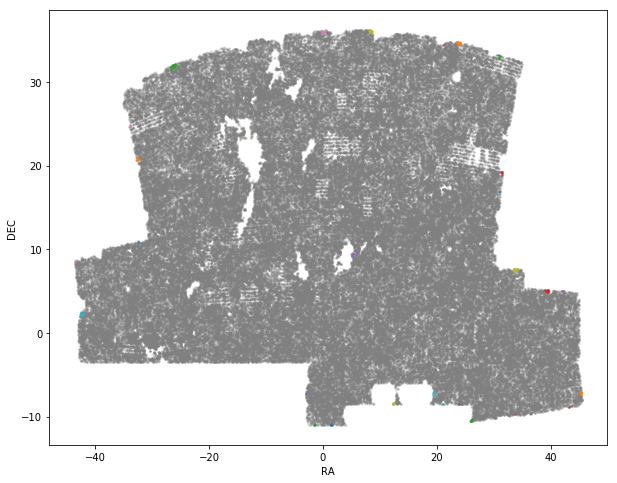

In [330]:
invalid_ind = np.arange(len(cmass_sgc_catlist) )[N_rand_sgc < cut*0.1 ]
sgc_clean = [cmass_sgc_catlist[i] for i in invalid_ind]
spatialcheck( [cmass_sgc]+sgc_clean )

In [ ]:
spatialcheck( [cmass_sgc, rand_sgc_catlist[0]] )

In [147]:
# stat error


hpix8 = hpRaDecToHEALPixel(cmass_mock['RA'], cmass_mock['DEC'], nside= nside )
hpix8rand = hpRaDecToHEALPixel(random_mock['RA'], random_mock['DEC'], nside= nside )
apix8 = hp.nside2pixarea(nside, degrees=True)

hpix8list = list(set(hpix8))
n_density_mock = np.zeros(len(hpix8list)-1)
N_mock = np.zeros(len(hpix8list)-1)
N_rand_mock = np.zeros(len(hpix8list)-1)

#fig, ax = plt.subplots()
for j in np.arange(0, len(hpix8list)-1, 2):
    ma = (hpix8 == hpix8list[j]) | (hpix8 == hpix8list[j+1])
    ma3 = (hpix8rand == hpix8list[j]) | (hpix8rand == hpix8list[j+1])    
    n_density_mock[j/2] = CalculateNumDensity(cmass_mock[ma], random_mock[ma3], weight = False )
    
    #cmass_mock_catlist.append(cmass_sgc[ma])
                              
    N_mock[j/2] = np.sum(ma)
    N_rand_mock[j/2] = np.sum(ma3)
    #n_density_mock[j/2] = N_mock[j] * 1./N_rand_mock[j]
    #ax.plot(cmass_mock[ma]['RA'], cmass_mock[ma]['DEC'], '.')  
    #ax.plot(cmass_mock[ma2]['RA'], cmass_mock[ma2]['DEC'], color = ax.lines[-1].get_color(), marker='.')  

cut = (len(hpix8list)-1)/2
n_density_mock = n_density_mock[:cut]
N_mock = N_mock[:cut]
N_rand_mock = N_rand_mock[:cut]

n_density_mock = n_density_mock[(n_density_mock !=0) & (N_rand_mock > N_rand_mock.mean() * 0.5 )]
print 'Cutting out patches whose area is smaller than 10percent of healpix nside=4'
n_density_mock_norm = n_density_mock * 1./np.mean(n_density_mock)
std_mock = np.std(n_density_mock_norm)

Cutting out patches whose area is smaller than 10percent of healpix nside=4


figsave : .//spatialtest_.png


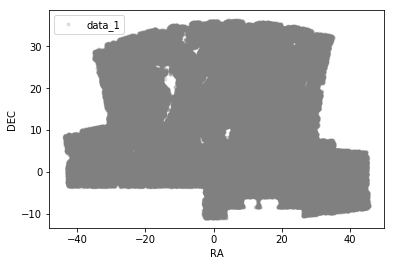

In [70]:

spatialcheck( [cmass_mock] )

In [15]:
# stat error

nside = 32
hpix8 = hpRaDecToHEALPixel(dmass_spt['RA'], dmass_spt['DEC'], nside= nside )
hpix8rand = hpRaDecToHEALPixel(random_spt['RA'], random_spt['DEC'], nside= nside )
apix8 = hp.nside2pixarea(nside, degrees=True)

hpix8list = list(set(hpix8))
n_density_spt = np.zeros(len(hpix8list)-1)
N_spt = np.zeros(len(hpix8list)-1)
N_rand_spt = np.zeros(len(hpix8list)-1)
cmass_spt_catlist = []
#fig, ax = plt.subplots()
for j in np.arange(0, len(hpix8list)-1, 1):
    ma = (hpix8 == hpix8list[j])# | (hpix8 == hpix8list[j+1])
    ma3 = (hpix8rand == hpix8list[j])# | (hpix8rand == hpix8list[j+1])    
    n_density_spt[j] = CalculateNumDensity(dmass_spt[ma], random_spt[ma3], weight = 'DES' )
    #cmass_mock_catlist.append(cmass_sgc[ma])
                              
    N_spt[j] = np.sum(ma)
    N_rand_spt[j] = np.sum(ma3)
    #n_density_spt[j] = N_spt[j] * 1./N_rand_spt[j]
    cmass_spt_catlist.append(dmass_spt[ma] )
    #ax.plot(cmass_mock[ma]['RA'], cmass_mock[ma]['DEC'], '.')  
    #ax.plot(cmass_mock[ma2]['RA'], cmass_mock[ma2]['DEC'], color = ax.lines[-1].get_color(), marker='.')  
    print '\r', j *1./ len(hpix8list) * 100, '%',
#cut = (len(hpix8list)-1)/2
#n_density_spt = n_density_spt[:cut]
#N_spt = N_spt[:cut]
#N_rand_spt = N_rand_spt[:cut]

#n_density_spt = n_density_spt[(n_density_spt !=0)& (N_rand_spt > N_rand_spt.mean() * 0.5 )]
#print 'Cutting out patches whose area is smaller than 10 percent of healpix nside=4'
#n_density_spt_norm = n_density_spt * 1./np.mean(n_density_spt)
#std_spt = np.std(n_density_spt_norm)

99.66499162479062 %                                                                       


In [36]:
cut = N_rand_spt[N_rand_spt>1000].mean()
valid_ind = np.arange(len(cmass_spt_catlist) )[N_rand_spt > cut*0.8 ]
valid_ind_split = np.array_split(valid_ind, len(valid_ind)/36 + 1)
print valid_ind_split[0].size, valid_ind_split[-1].size

n_density_spt = []

for vi in valid_ind_split:
    n_density_spt.append( np.sum(N_spt[vi])*1./ np.sum(N_rand_spt[vi]) )
    
#n_density_sgc = n_density_sgc[(n_density_sgc !=0) & (N_rand_sgc > N_rand_sgc.mean() * 0.5 )]
#print 'Cutting out patches whose area is smaller than 10percent of healpix nside=4'
      
n_density_spt = np.array(n_density_spt)
n_density_spt_norm = n_density_spt * 1./np.mean(n_density_spt)
std_spt = np.std(n_density_spt_norm)

34 33


In [28]:
n_density_spt_norm

array([0.98015372, 0.97953163, 1.01291621, 0.99289414, 0.97028124,
       1.01592442, 1.02390139, 1.00495205, 1.00894864, 1.00269895,
       1.02635548, 1.01264616, 1.030999  , 0.96250549, 1.03630078,
       0.96709429, 0.97189641])

figsave : .//spatialtest_.png


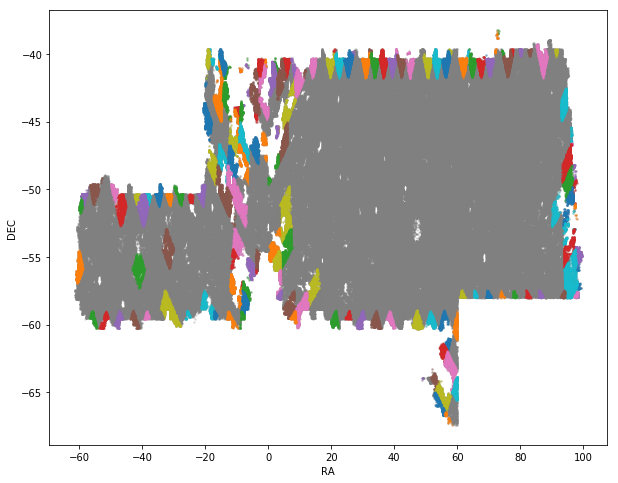

In [35]:
cut = N_rand_spt[N_rand_spt>1000].mean()
invalid_ind = np.arange(len(cmass_spt_catlist) )[N_rand_spt < cut*0.8 ]
spt_clean = [cmass_spt_catlist[i] for i in invalid_ind]
spatialcheck( [dmass_spt]+spt_clean )

In [141]:
cmass_train.size, random_train.size, n_density_st82, n_density_spt.mean()

(11972, 506687, 0.023627999139508218, 0.019871231756378914)

In [73]:
n_density_dmass_st82_des, n_density_st82_des, n_density_st82

(0.02259369877503615, 0.022496680514865267, 0.023627999139508218)

In [74]:
np.sum(dmass_st82['EachProb_CMASS']), dmass_st82.size, dmass_spt.size

(11621.90493179452, 66105, 638005)

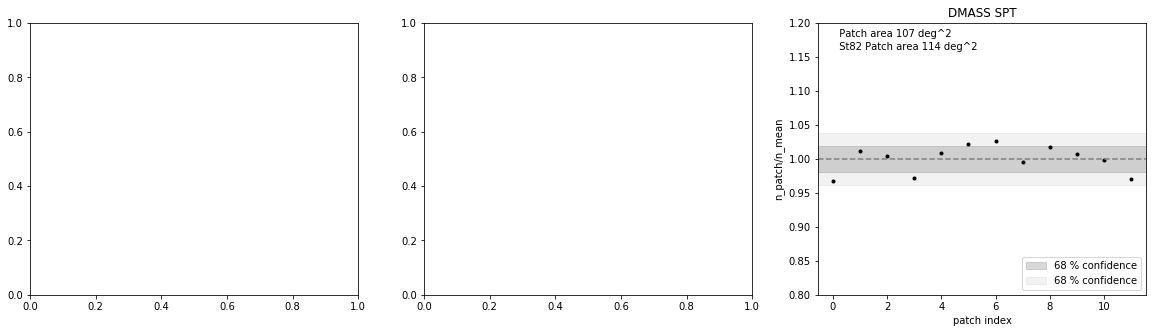

In [37]:
#n_density_st82 = CalculateNumDensity(cmass_train, random_train, weight = False)
#n_density_st82_des = CalculateNumDensity(train, random_st82, weight = False)
#n_density_dmass_st82_des = CalculateNumDensity(dmass_st82, random_st82, weight = 'DES')

apix = hp.nside2pixarea(8, degrees=True)*2


# plot------------------
fig,(ax, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5))

mean_spt = n_density_spt_norm.mean()

ax3.axhspan( mean_spt - std_spt, mean_spt + std_spt, alpha=0.3, color='grey', label = '68 % confidence')
ax3.axhspan( mean_spt - 2*std_spt, mean_spt + 2*std_spt, alpha=0.1, color='grey', label = '68 % confidence')
#ax.axhspan( 1. - 2*defined_sigma_st82/mean, 1 + 2*defined_sigma_st82/mean, alpha=0.1, color='grey', linestyle = None, label = '95 % confidence')
#ax.errorbar( np.arange(n_density.size)[mask], n_density[mask]/mean, yerr = sigma_f[mask], fmt='none' )
ax3.plot( np.arange(n_density_spt_norm.size), n_density_spt_norm, marker = '.' , linestyle = 'none', color = 'black' )
#ax3.plot( n_density_spt_norm.size/3., n_density_st82_des/n_density_spt.mean(), marker = '*', color = 'red',  markersize = 10, linestyle = 'none', label = 'train st82')
#ax3.plot( n_density_spt_norm.size/2., n_density_dmass_st82_des/n_density_spt.mean(), marker = '*', color = 'blue',  markersize = 10, linestyle = 'none', label = 'dmass st82')
ax3.axhline(y = mean_spt, linestyle='--', color = 'grey')
ax3.set_title('DMASS SPT')
ax3.set_ylim(0.8, 1.2)
ax3.legend(loc=4)
ax3.set_ylabel('n_patch/n_mean')
ax3.set_xlabel('patch index')
ax3.text(0, 1.18, '  Patch area {:0.0f} deg^2'.format(apix))
ax3.text(0, 1.16, '  St82 Patch area {:0.0f} deg^2'.format(114))

#fig.savefig('../paper_figure/ndensity_corrected.pdf')

NameError: name 'n_density_spt_norm' is not defined

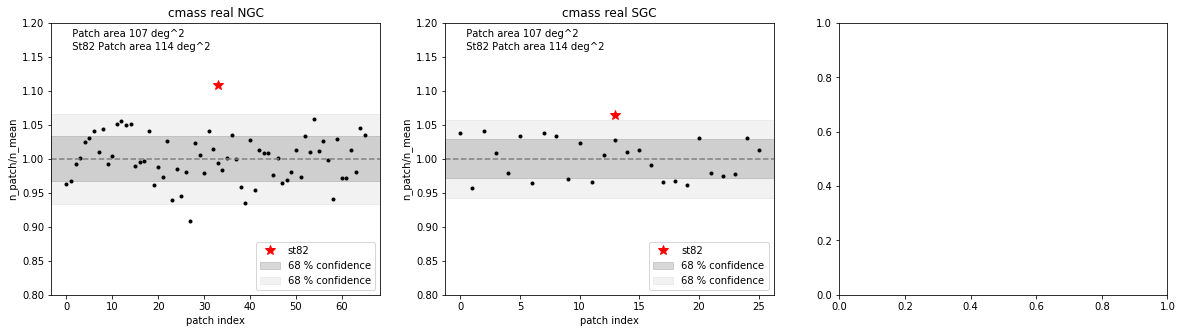

In [337]:
n_density_st82 = CalculateNumDensity(cmass_train, random_train, weight = False)
#n_density_st82_des = CalculateNumDensity(train, random_st82, weight = False)
#n_density_dmass_st82_des = CalculateNumDensity(dmass_st82, random_st82, weight = 'DES')

apix = hp.nside2pixarea(8, degrees=True)*2


# plot------------------
fig,(ax, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5))

mean_ngc = n_density_ngc_norm.mean()
ax.axhspan( mean_ngc - std_ngc, mean_ngc + std_ngc, alpha=0.3, color='grey', label = '68 % confidence')
ax.axhspan( mean_ngc - 2*std_ngc, mean_ngc + 2*std_ngc, alpha=0.1, color='grey', label = '68 % confidence')
#ax.axhspan( 1. - 2*defined_sigma_st82/mean, 1 + 2*defined_sigma_st82/mean, alpha=0.1, color='grey', linestyle = None, label = '95 % confidence')

#ax.errorbar( np.arange(n_density_ngc_norm.size), n_density_ngc_norm, yerr = err_ngc, fmt='o' )

ax.plot( np.arange(n_density_ngc_norm.size), n_density_ngc_norm, marker = '.' , linestyle = 'none', color = 'black' )
ax.plot( n_density_ngc_norm.size/2., n_density_st82/n_density_ngc.mean(), marker = '*', color = 'red',  markersize = 10, linestyle = 'none', label = 'st82')
ax.axhline(y = mean_ngc, linestyle='--', color = 'grey')
ax.set_title('cmass real NGC')
ax.set_ylim(0.8, 1.2)
ax.legend(loc=4)
ax.set_ylabel('n_patch/n_mean')
ax.set_xlabel('patch index')
ax.text(0, 1.18, '  Patch area {:0.0f} deg^2'.format(apix))
ax.text(0, 1.16, '  St82 Patch area {:0.0f} deg^2'.format(114))


# Define st82 number density uncertainty ----

mean_sgc = n_density_sgc_norm.mean()
ax2.axhspan( mean_sgc - std_sgc, mean_sgc + std_sgc, alpha=0.3, color='grey', label = '68 % confidence')
ax2.axhspan( mean_sgc - 2*std_sgc, mean_sgc + 2*std_sgc, alpha=0.1, color='grey', label = '68 % confidence')
ax2.plot( np.arange(n_density_sgc_norm.size), n_density_sgc_norm, marker = '.', linestyle = 'none', color = 'black')
ax2.plot( n_density_sgc_norm.size/2., n_density_st82/n_density_sgc.mean(), marker = '*', markersize = 10, linestyle='none' , color = 'red', label = 'st82')
ax2.axhline(y = mean_sgc, linestyle='--', color = 'grey')
ax2.set_title('cmass real SGC')
ax2.set_ylim(0.8, 1.2)
ax2.legend(loc=4)
ax2.set_ylabel('n_patch/n_mean')
ax2.set_xlabel('patch index')
ax2.text(0, 1.18, '  Patch area {:0.0f} deg^2'.format(apix))
ax2.text(0, 1.16, '  St82 Patch area {:0.0f} deg^2'.format(114))



mean_spt = n_density_spt_norm.mean()

ax3.axhspan( mean_spt - std_spt, mean_spt + std_spt, alpha=0.3, color='grey', label = '68 % confidence')
ax3.axhspan( mean_spt - 2*std_spt, mean_spt + 2*std_spt, alpha=0.1, color='grey', label = '68 % confidence')
#ax.axhspan( 1. - 2*defined_sigma_st82/mean, 1 + 2*defined_sigma_st82/mean, alpha=0.1, color='grey', linestyle = None, label = '95 % confidence')
#ax.errorbar( np.arange(n_density.size)[mask], n_density[mask]/mean, yerr = sigma_f[mask], fmt='none' )
ax3.plot( np.arange(n_density_spt_norm.size), n_density_spt_norm, marker = '.' , linestyle = 'none', color = 'black' )
ax3.plot( n_density_spt_norm.size/3., n_density_st82_des/n_density_spt.mean(), marker = '*', color = 'red',  markersize = 10, linestyle = 'none', label = 'train st82')
#ax3.plot( n_density_spt_norm.size/2., n_density_dmass_st82_des/n_density_spt.mean(), marker = '*', color = 'blue',  markersize = 10, linestyle = 'none', label = 'dmass st82')
ax3.axhline(y = mean_spt, linestyle='--', color = 'grey')
ax3.set_title('DMASS SPT')
ax3.set_ylim(0.8, 1.2)
ax3.legend(loc=4)
ax3.set_ylabel('n_patch/n_mean')
ax3.set_xlabel('patch index')
ax3.text(0, 1.18, '  Patch area {:0.0f} deg^2'.format(apix))
ax3.text(0, 1.16, '  St82 Patch area {:0.0f} deg^2'.format(114))

#fig.savefig('../paper_figure/ndensity_corrected.pdf')

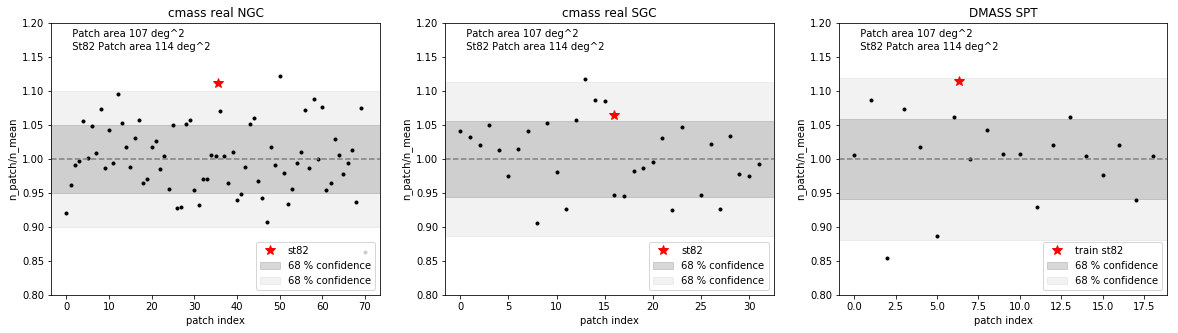

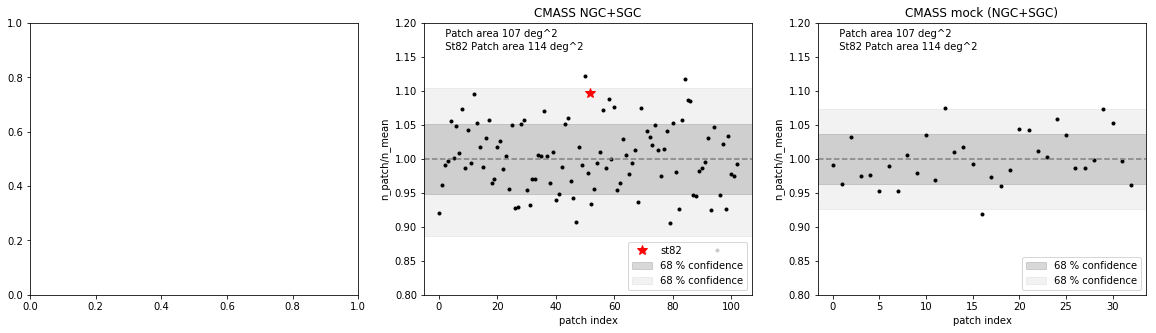

In [165]:
fig,(ax, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5))

#full cmass
 
n_density_full = np.hstack( [n_density_ngc, n_density_sgc] ) 
n_density_full_norm = np.hstack( [n_density_ngc_norm, n_density_sgc_norm] ) 
std_full = np.std(n_density_full_norm)
mean_full = n_density_full_norm.mean()



ax2.axhspan( mean_full - std_full, mean_full + std_full, alpha=0.3, color='grey', label = '68 % confidence')
ax2.axhspan( mean_full - 2*std_sgc, mean_full + 2*std_full, alpha=0.1, color='grey', label = '68 % confidence')
ax2.plot( np.arange(n_density_full_norm.size), n_density_full_norm, marker = '.', linestyle = 'none', color = 'black')
ax2.plot( n_density_full_norm.size/2., n_density_st82/n_density_full.mean(), marker = '*', markersize = 10, linestyle='none' , color = 'red', label = 'st82')
ax2.axhline(y = mean_full, linestyle='--', color = 'grey')
ax2.set_title('CMASS NGC+SGC')
ax2.set_ylim(0.8, 1.2)
ax2.legend(loc=4)
ax2.set_ylabel('n_patch/n_mean')
ax2.set_xlabel('patch index')
ax2.text(0, 1.18, '  Patch area {:0.0f} deg^2'.format(apix))
ax2.text(0, 1.16, '  St82 Patch area {:0.0f} deg^2'.format(114))



mean_mock = n_density_mock_norm.mean()
ax3.axhspan( mean_mock - std_mock, mean_mock + std_mock, alpha=0.3, color='grey', label = '68 % confidence')
ax3.axhspan( mean_mock - 2*std_mock, mean_mock + 2*std_mock, alpha=0.1, color='grey', label = '68 % confidence')


ax3.plot( np.arange(n_density_mock_norm.size), n_density_mock_norm, \
            linestyle='none', marker ='.', color='black')
#ax3.plot( 15, n_density_st/mean_mock, marker = '*', markersize = 10, linestyle='none' , color = 'red', label = 'st82')
ax3.axhline(y = mean_mock, linestyle='--', color = 'grey')
ax3.set_title('CMASS mock (NGC+SGC)')
ax3.set_ylim(0.8, 1.2)
ax3.set_ylabel('n_patch/n_mean')
ax3.set_xlabel('patch index')
ax3.legend(loc = 4)
ax3.text(0, 1.18, '  Patch area {:0.0f} deg^2'.format(apix))
ax3.text(0, 1.16, '  St82 Patch area {:0.0f} deg^2'.format(114))

In [173]:
n_density_st82_train, n_density_st82_desrandom, train.size, cmass_train.size

(0.022838557136851744, 0.023274305143792515, 11572, 11972)

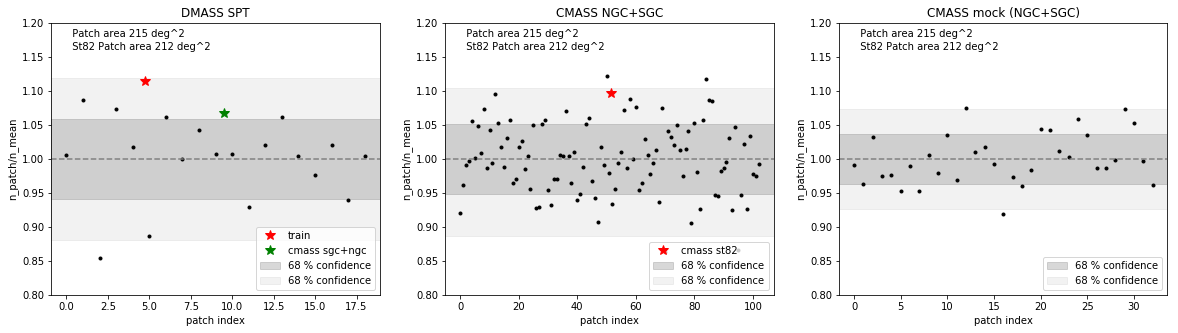

In [169]:
#n_density_st82 = CalculateNumDensity(cmass_train, random_train, weight = False)
#n_density_st82_des = CalculateNumDensity(cmass_train, random_st82, weight = False)
#n_density_dmass_st82_des = CalculateNumDensity(dmass_st82, random_st82, weight = False)

n_density_st82_train = CalculateNumDensity(train, random_train, weight = False)
n_density_st82_desrandom = CalculateNumDensity(cmass_train, random_st82, weight = False)

apix = hp.nside2pixarea(4, degrees=True)


fig,(ax, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5))


mean_spt = n_density_spt_norm.mean()

ax.axhspan( mean_spt - std_spt, mean_spt + std_spt, alpha=0.3, color='grey', label = '68 % confidence')
ax.axhspan( mean_spt - 2*std_spt, mean_spt + 2*std_spt, alpha=0.1, color='grey', label = '68 % confidence')
#ax.axhspan( 1. - 2*defined_sigma_st82/mean, 1 + 2*defined_sigma_st82/mean, alpha=0.1, color='grey', linestyle = None, label = '95 % confidence')
#ax.errorbar( np.arange(n_density.size)[mask], n_density[mask]/mean, yerr = sigma_f[mask], fmt='none' )
ax.plot( np.arange(n_density_spt_norm.size), n_density_spt_norm, marker = '.' , linestyle = 'none', color = 'black' )

#ax.plot( n_density_spt_norm.size/3., n_density_dmass_st82_des/n_density_spt.mean(), marker = '*', color = 'blue',  markersize = 10, linestyle = 'none', label = 'dmass st82')
#ax.plot( n_density_spt_norm.size/4., n_density_st82_desrandom/n_density_spt.mean(), marker = '*', color = 'red',  markersize = 10, linestyle = 'none', label = 'cmass st82')
ax.plot( n_density_spt_norm.size/4., n_density_st82_des/n_density_spt.mean(), marker = '*', color = 'red',  markersize = 10, linestyle = 'none', label = 'train')

ax.plot( n_density_spt_norm.size/2., n_density_full.mean()/n_density_spt.mean(), marker = '*', color = 'green',  markersize = 10, linestyle = 'none', label = 'cmass sgc+ngc')


ax.axhline(y = mean_spt, linestyle='--', color = 'grey')
ax.set_title('DMASS SPT')
ax.set_ylim(0.8, 1.2)
ax.legend(loc=4)
ax.set_ylabel('n_patch/n_mean')
ax.set_xlabel('patch index')
ax.text(0, 1.18, '  Patch area {:0.0f} deg^2'.format(apix))
ax.text(0, 1.16, '  St82 Patch area {:0.0f} deg^2'.format(212))

#full cmass
 
n_density_full = np.hstack( [n_density_ngc, n_density_sgc] ) 
n_density_full_norm = np.hstack( [n_density_ngc_norm, n_density_sgc_norm] ) 
std_full = np.std(n_density_full_norm)
mean_full = n_density_full_norm.mean()

ax2.axhspan( mean_full - std_full, mean_full + std_full, alpha=0.3, color='grey', label = '68 % confidence')
ax2.axhspan( mean_full - 2*std_sgc, mean_full + 2*std_full, alpha=0.1, color='grey', label = '68 % confidence')
ax2.plot( np.arange(n_density_full_norm.size), n_density_full_norm, marker = '.', linestyle = 'none', color = 'black')
ax2.plot( n_density_full_norm.size/2., n_density_st82/n_density_full.mean(), marker = '*', markersize = 10, linestyle='none' , color = 'red', label = 'cmass st82')
#ax2.plot( n_density_full_norm.size/2., n_density_st82_train/n_density_full.mean(), marker = '*', markersize = 10, linestyle='none' , color = 'orange', label = 'train')
ax2.axhline(y = mean_full, linestyle='--', color = 'grey')
ax2.set_title('CMASS NGC+SGC')
ax2.set_ylim(0.8, 1.2)
ax2.legend(loc=4)
ax2.set_ylabel('n_patch/n_mean')
ax2.set_xlabel('patch index')
ax2.text(0, 1.18, '  Patch area {:0.0f} deg^2'.format(apix))
ax2.text(0, 1.16, '  St82 Patch area {:0.0f} deg^2'.format(114))



mean_mock = n_density_mock_norm.mean()
ax3.axhspan( mean_mock - std_mock, mean_mock + std_mock, alpha=0.3, color='grey', label = '68 % confidence')
ax3.axhspan( mean_mock - 2*std_mock, mean_mock + 2*std_mock, alpha=0.1, color='grey', label = '68 % confidence')


ax3.plot( np.arange(n_density_mock_norm.size), n_density_mock_norm, \
            linestyle='none', marker ='.', color='black')
#ax3.plot( 15, n_density_st/mean_mock, marker = '*', markersize = 10, linestyle='none' , color = 'red', label = 'st82')
ax3.axhline(y = mean_mock, linestyle='--', color = 'grey')
ax3.set_title('CMASS mock (NGC+SGC)')
ax3.set_ylim(0.8, 1.2)
ax3.set_ylabel('n_patch/n_mean')
ax3.set_xlabel('patch index')
ax3.legend(loc = 4)
ax3.text(0, 1.18, '  Patch area {:0.0f} deg^2'.format(apix))
ax3.text(0, 1.16, '  St82 Patch area {:0.0f} deg^2'.format(114))




In [394]:
redstar, bluestar

(1.0777908100842029, 1.0999623118344912)

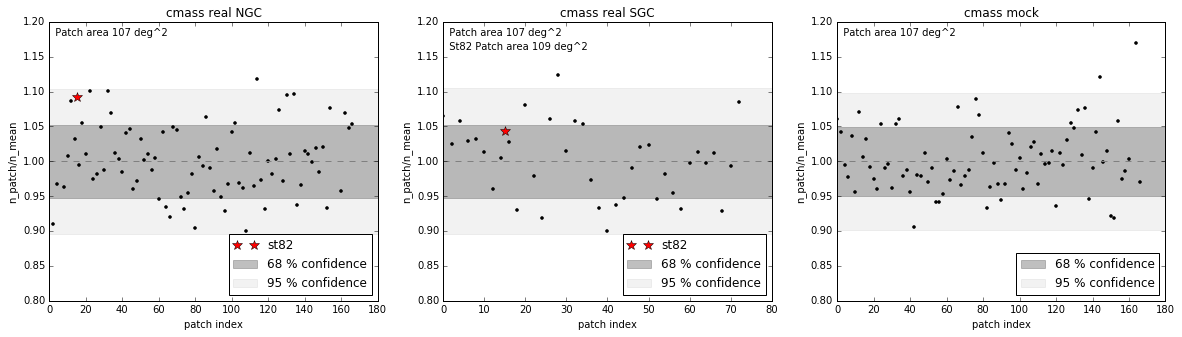

In [32]:
# NGC --------------------------------------
mask = N_rand > N_rand.mean() * 0.1
mean = n_density[mask].mean()

# SGC --------------------------------------
sgc_mask = (N_rand_sgc > N_rand_sgc.mean() * 0.1)# & (n_density_sgc != 0)
mean_sgc = n_density_sgc[sgc_mask].mean()

# MOCK --------------------------------------
mock_mask = N_rand_mock > N_rand_mock.mean() * 0.1
mean_mock = n_density_mock[mock_mask].mean()


# plot------------------
fig,(ax, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5))

# Define st82 number density uncertainty ----
defined_sigma_st82 = np.std(n_density[mask])

ax.axhspan( 1. - defined_sigma_st82/mean, 1 + defined_sigma_st82/mean, alpha=0.5, color='grey', label = '68 % confidence')
ax.axhspan( 1. - 2*defined_sigma_st82/mean, 1 + 2*defined_sigma_st82/mean, alpha=0.1, color='grey', linestyle = None, label = '95 % confidence')
#ax.errorbar( np.arange(n_density.size)[mask], n_density[mask]/mean, yerr = sigma_f[mask], fmt='none' )
ax.plot( np.arange(n_density.size)[mask], n_density[mask]/mean, marker = '.' , linestyle = 'none', color = 'black' )
ax.plot( 15, n_density_st/mean, marker = '*', color = 'red',  markersize = 10, linestyle = 'none', label = 'st82')
ax.axhline(y = 1, linestyle='--', color = 'grey')
ax.set_title('cmass real NGC')
ax.set_ylim(0.8, 1.2)
ax.legend(loc=4)
ax.set_ylabel('n_patch/n_mean')
ax.set_xlabel('patch index')
ax.text(0, 1.18, '  Patch area {:0.0f} deg^2'.format(apix8 * 2))


# Define st82 number density uncertainty ----
defined_sigma_st82 = np.std(n_density_sgc[sgc_mask])

ax2.axhspan( 1. - defined_sigma_st82/mean_sgc, 1 + defined_sigma_st82/mean_sgc, alpha=0.5, color='grey', label = '68 % confidence')
ax2.axhspan( 1. - 2*defined_sigma_st82/mean_sgc, 1 + 2*defined_sigma_st82/mean_sgc, alpha=0.1, color='grey', label = '95 % confidence')
ax2.plot( np.arange(n_density_sgc.size)[sgc_mask], n_density_sgc[sgc_mask]/mean_sgc, marker = '.', linestyle = 'none', color = 'black')
ax2.plot( 15, n_density_st/mean_sgc, marker = '*', markersize = 10, linestyle='none' , color = 'red', label = 'st82')
ax2.axhline(y = 1, linestyle='--', color = 'grey')
ax2.set_title('cmass real SGC')
ax2.set_ylim(0.8, 1.2)
ax2.legend(loc=4)
ax2.set_ylabel('n_patch/n_mean')
ax2.set_xlabel('patch index')
ax2.text(0, 1.18, '  Patch area {:0.0f} deg^2'.format(apix8 * 2))
ax2.text(0, 1.16, '  St82 Patch area {:0.0f} deg^2'.format(109))


# Define st82 number density uncertainty ----

# Define st82 number density uncertainty ----
defined_sigma_st82 = np.std(n_density_mock[mock_mask])

ax3.axhspan( 1. - defined_sigma_st82/mean_mock, 1 + defined_sigma_st82/mean_mock, alpha=0.5, color='grey', label = '68 % confidence')
ax3.axhspan( 1. - 2*defined_sigma_st82/mean_mock, 1 + 2*defined_sigma_st82/mean_mock, alpha=0.1, color='grey', label = '95 % confidence')
ax3.plot( np.arange(n_density_mock.size)[mock_mask], n_density_mock[mock_mask]/mean_mock, \
            linestyle='none', marker ='.', color='black')
ax3.axhline(y = 1, linestyle='--', color = 'grey')
ax3.set_title('cmass mock')
ax3.set_ylim(0.8, 1.2)
ax3.set_ylabel('n_patch/n_mean')
ax3.set_xlabel('patch index')
ax3.legend(loc = 4)
ax3.text(0, 1.18, '  Patch area {:0.0f} deg^2'.format(apix8 * 2))